In [ ]:

%pip install pandas matplotlib scikit-learn
%pip install --upgrade pip


  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd


In [ ]:
# Load the dataset from your local directory
file_path = ''

df = pd.read_csv('/content/Mall_Customers.csv')

# Check the shape and the first few rows of the dataset
print(df.shape)
print(df.head())


(200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df["A"] = df["Annual Income (k$)"]
df["B"] = df["Spending Score (1-100)"]

X = df[["A", "B"]]
print(X.head())


    A   B
0  15  39
1  15  81
2  16   6
3  16  77
4  17  40


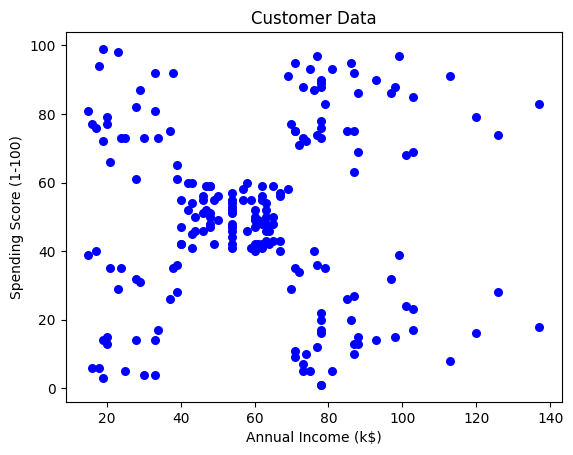

In [ ]:
plt.scatter(X["A"], X["B"], s=30, c='b')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Data")
plt.show()


In [ ]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)

centers = Kmean.cluster_centers_
print("Cluster Centers:\n", centers)

clusters = Kmean.fit_predict(X)
df["label"] = clusters
print(df.head(100))


Cluster Centers:
 [[55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [87.75       17.58333333]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)   A  \
0            1    Male   19                  15                      39  15   
1            2    Male   21                  15                      81  15   
2            3  Female   20                  16                       6  16   
3            4  Female   23                  16                      77  16   
4            5  Female   31                  17                      40  17   
..         ...     ...  ...                 ...                     ...  ..   
95          96    Male   24                  60                      52  60   
96          97  Female   47                  60                      47  60   
97          98  Female   27                  60                      50  60   
98          99    Male   48                  61         

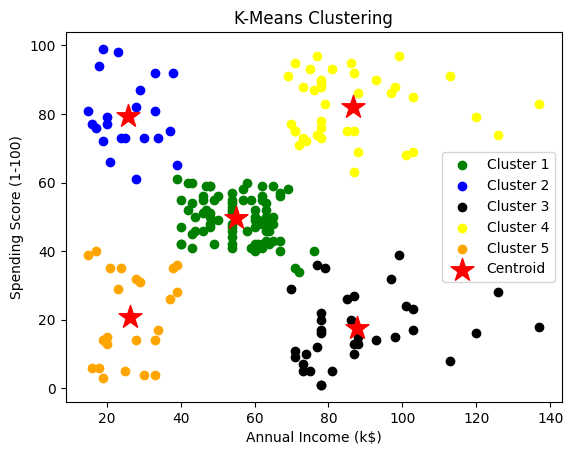

In [ ]:
col = ['green', 'blue', 'black', 'yellow', 'orange']

for i in range(5):
    plt.scatter(df.A[df.label == i], df.B[df.label == i], c=col[i], label=f'Cluster {i + 1}')

plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300, c='red', label='Centroid')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


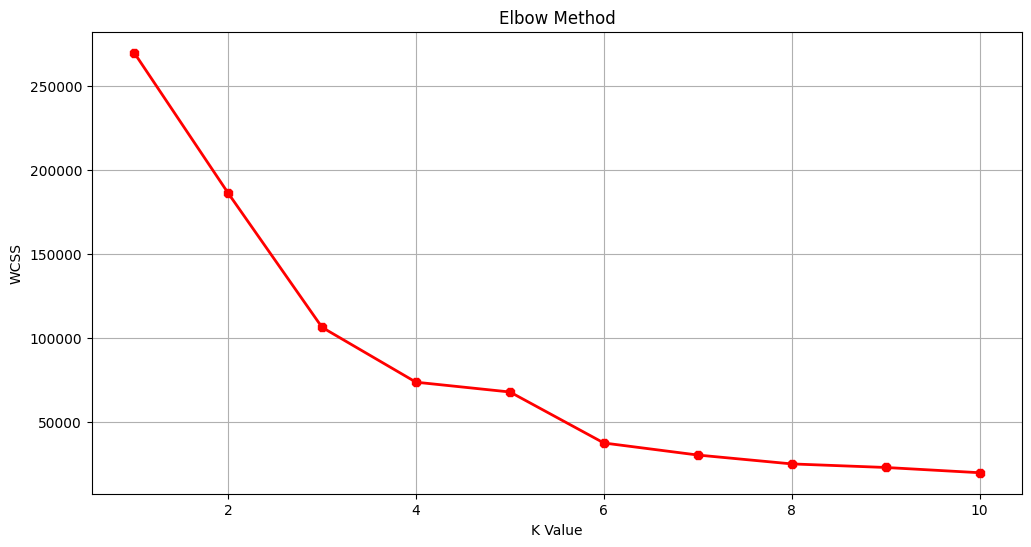

In [ ]:
X1 = X.loc[:, ["A", "B"]].values
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [ ]:
df.to_csv('clustered_customers.csv', index=False)
